In [37]:
import pandas as pd
import numpy as np

df=pd.read_csv("Datafiniti_Womens_Shoes.csv")

df.loc[:,['prices.size']]

,prices.size
0,S
1,6
2,6
3,6
4,6
...,...
9995,7.5
9996,7
9997,11
9998,6.5


In [38]:
#check if there are missing values

df['prices.size'].isnull().sum()

0

In [39]:
#address the incosistency in data

df['prices.size'].unique()

array(['S', '6', '5', 'SMALL', 'MEDIUM', '7', '9', '8', '6.5', '10',
       '9.5', '8.5', '5.5', '8.5 WIDE', '9 WIDE', '7 WIDE', '6 WIDE',
       '7.5 WIDE', '11', '9.5 WIDE', '8 WIDE', '7.5', '11 WIDE', '8 MED',
       '5.5 MED', '5 MED', '9 MED', '6.5 MED', '6 MED', '7.5 MED',
       '9.5 MED', 'Medium', '4', '8.5 MED', '7 MED', '12', '12 MED',
       '10 WIDE', '6.5 WIDE', '10 MED', '11 MED', 'LARGE', '10.5 WIDE',
       '10.5', '12 WIDE', '5.5 WIDE', '5 WIDE', '10.5 MED', '40', '39',
       '42', '41', '38 WIDE', '37', '36 WIDE', '41 WIDE', '36', '40 WIDE',
       '38', '35', '11.5 WIDE', '11.5', '40.5', 'US 9.5/UK 8.0',
       'US 9.0/UK 7.5', 'US 8.5/UK 7.0', '41.5', '38.5', 'US 6.0/UK 4.5',
       'US 7.0/UK 5.5', 'US 10.0/UK 8.5', 'US 7.5/UK 6.0',
       'US 11.0/UK 9.5', 'US 10.5/UK 9.0', 'US 6.5/UK 5.0',
       'US 8.0/UK 6.5', '39.5', 'Mens 7.0/Womens 8.5',
       'Mens 7.5/Womens 9.0', 'Mens 8.5/Womens 10.0',
       'Mens 4.5/Womens 6.0', 'Mens 6.0/Womens 7.5',
       'Mens

In [ ]:
#keep US size only






In [ ]:
#keep women size only






In [4]:
#converting data type to numeric 

cleaned_size= df['prices.size'] = pd.to_numeric(df['prices.size'], errors='coerce')
print(cleaned_size)

0        NaN
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
9995     7.5
9996     7.0
9997    11.0
9998     6.5
9999    40.0
Name: prices.size, Length: 10000, dtype: float64


In [5]:
data=cleaned_size
df_cleaned=pd.DataFrame(data)
df_cleaned

,prices.size
0,NaN
1,6.0
2,6.0
3,6.0
4,6.0
...,...
9995,7.5
9996,7.0
9997,11.0
9998,6.5


In [6]:
df_cleaned['prices.size'].unique()

#why there are still numbers as unique values?
#how to keep US sizes only and remove UK sizes???

array([ nan,  6. ,  5. ,  7. ,  9. ,  8. ,  6.5, 10. ,  9.5,  8.5,  5.5,
       11. ,  7.5,  4. , 12. , 10.5, 40. , 39. , 42. , 41. , 37. , 36. ,
       38. , 35. , 11.5, 40.5, 41.5, 38.5, 39.5])

In [9]:
df_cleaned['prices.size'].max()


42.0

In [34]:
#converting EU sizes to US sizes


import pandas as pd

import numpy as np

n=df_cleaned['prices.size'].to_numpy()

print(n)


[ nan  6.   6.  ... 11.   6.5  9. ]


In [40]:
# Conversion table: EU sizes mapped to corresponding US sizes
to_us_sizes = {
    '34': 4,
    '34.5': 4.5,
    '35': 5,
    '35.5': 5.5,
    '36': 6,
    '36.5': 6,
    '37': 6.5,
    '37.5': 7,
    '38': 7.5,
    '38.5': 7.5,
    '39': 8,
    '39.5': 8.5,
    '40': 9,
    '40.5': 9.5,
    '41': 9.5,
    '41.5': 10,
    '42': 10.5
}

def convert_to_us(n):
    if n < 34:
        return n
    else:
        keys = sorted(to_us_sizes.keys(), key=float, reverse=True)

        for key in keys:
            if float(key) <= n:
                return to_us_sizes[key]

        return n  
df_cleaned['prices.size'] = df_cleaned['prices.size'].apply(convert_to_us)

print(df_cleaned['prices.size'])
 

0        NaN
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
9995     7.5
9996     7.0
9997    11.0
9998     6.5
9999     9.0
Name: prices.size, Length: 10000, dtype: float64


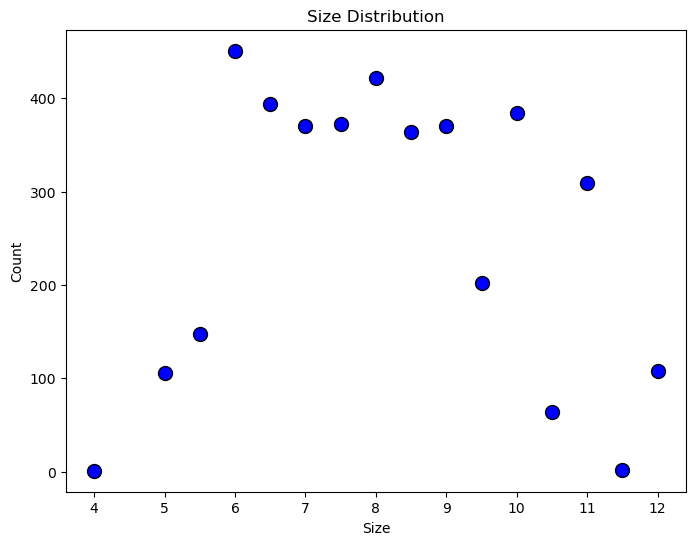

In [47]:
#data visualization

size_counts = df_cleaned['prices.size'].value_counts()

plt.figure(figsize=(8, 6))
plt.scatter(size_counts.index, size_counts.values, s=100, color='b', edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Size Distribution')
plt.xticks(rotation=0)
plt.show()

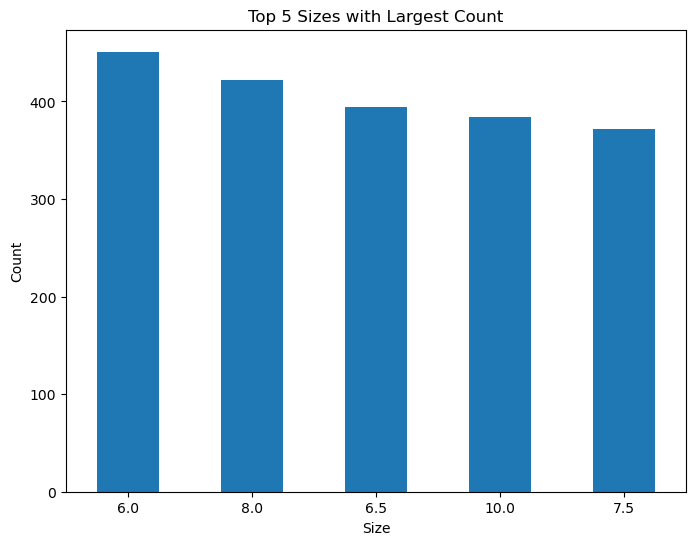

In [41]:
# data analysis 

import pandas as pd
import matplotlib.pyplot as plt

# Find the top 5 sizes with the largest count
top_sizes = df_cleaned['prices.size'].value_counts().nlargest(5)

# Plot the top 5 sizes with the largest count
plt.figure(figsize=(8, 6))
top_sizes.plot(kind='bar')
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Top 5 Sizes with Largest Count')
plt.xticks(rotation=0)
plt.show()